# Prova Final


## Estatística para Ciência de Dados

por **Cibele Russo** (ICMC/USP - São Carlos SP)

**MBA em Ciências de Dados**

A diabetes é uma doença causada pela produção insuficiente ou má absorção de insulina, hormônio que regula a glicose no sangue e garante energia para o organismo. Em um estudo, 150 pacientes com diabetes ou pré-diabetes receberam acompanhamento por 2 anos e em seguida foram coletadas informações básicas: idade, sexo, índice de massa corporal, pressão arterial média e uma medida de soro sanguíneo, além da medida de hemoglobina glicada e a classificação se o indivíduo tem ou não diabetes após o acompanhamento. A listagem das variáveis disponíveis é dada a seguir

- 'Idade', em anos completos;
- 'Sexo' (1 se feminino, 0 se masculino);
- 'IMC': Índice de massa corporal;
- 'PAM': Pressão arterial média;
- 'S': uma medida de soro sanguíneo;
- 'Y': hemoglobina glicada;
- 'diabetes': 1, se o paciente desenvolveu diabetes e 0, caso contrário;

Atenção: 'Y' e 'diabetes' são ambas variáveis-resposta, uma contínua e uma categórica, e não devem ser usadas como variáveis preditoras.

Os dados estão disponíveis em https://raw.githubusercontent.com/cibelerusso/Datasets/main/diabetes.csv


1. Investigue a associação de cada uma das variáveis com a resposta 'Y' com uma **análise exploratória de dados** via matriz de gráficos de dispersão e matriz de correlações, para verificar a associação entre as variáveis. Comente os resultados obtidos.



2. Ajuste um **modelo de regressão linear** com intercepto, com resposta 'Y' e todas as variáveis preditoras: 'Idade', 'Sexo', 'IMC', 'PAM' e 'S'. Considerando o valor-p (P>|t|), indique as duas preditoras com maior significância estatística marginal neste modelo e interprete seus coeficientes.



3. Faça uma **análise descritiva dos dados**. Qual o percentual de pacientes de cada sexo que desenvolveu e não desenvolveu diabetes? Investigue a associação de cada uma das preditoras contínuas com a resposta 'diabetes' via **análise exploratória de dados** para verificar a associação entre as variáveis. Comente os resultados obtidos.



4. Ajuste um **modelo de regressão logística** com intercepto para a resposta 'diabetes' com preditoras 'Idade', 'Sexo', 'IMC', 'PAM' e 'S'. Esse modelo é um MLG com resposta binomial e ligação logito. Avalie como as preditoras 'Idade' e 'IMC' influenciam na resposta 'diabetes' (sugestão: razão de chances, dada neste modelo por $OR = \exp(b_j)$, em que $b_j$ é o coeficiente estimado correspondente à j-ésima preditora).



5. Desenvolva uma análise de pontos de alavanca e, caso haja alguma observação em destaque, identifique-a e investigue se ela contém algum comportamento inesperado.  


A entrega deve ser feita com um notebook executado no formato .ipynb, com os códigos usados para a obtenção dos resultados. O notebook deve ser comentado de forma a facilmente identificar os códigos de cada análise. Alguns códigos de apoio são fornecidos abaixo, para a leitura dos dados e para iniciar as suas análises. Procure utilizar bibliotecas Python abordadas na disciplina.

Para esta aplicação, considere que não é necessário fazer mais nenhuma seleção de atributos ou dividir a base em treinamento e teste.

Atenção: se constatado plágio, a questão será zerada.




## Carregamento de pacotes e leitura de dados

In [1]:
# Carrega os pacotes
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
caminho = 'https://raw.githubusercontent.com/cibelerusso/Datasets/main/diabetes.csv'
df = pd.read_csv(caminho, sep=';', index_col='ID')
df.head(3)

,Idade,Sexo,IMC,PAM,S,Y,diabetes
ID,,,,,,,
112126,32,0,27.2878,84.9978,6.0216,6.1589,0
897505,43,1,29.5730,82.5959,5.1257,6.9437,1
650952,47,1,24.3119,88.0686,3.4778,7.2397,1


# 1.  Análise exploratória de dados
(Alguns códigos são sugeridos. Inclua outros, se necessário, e responda às perguntas)


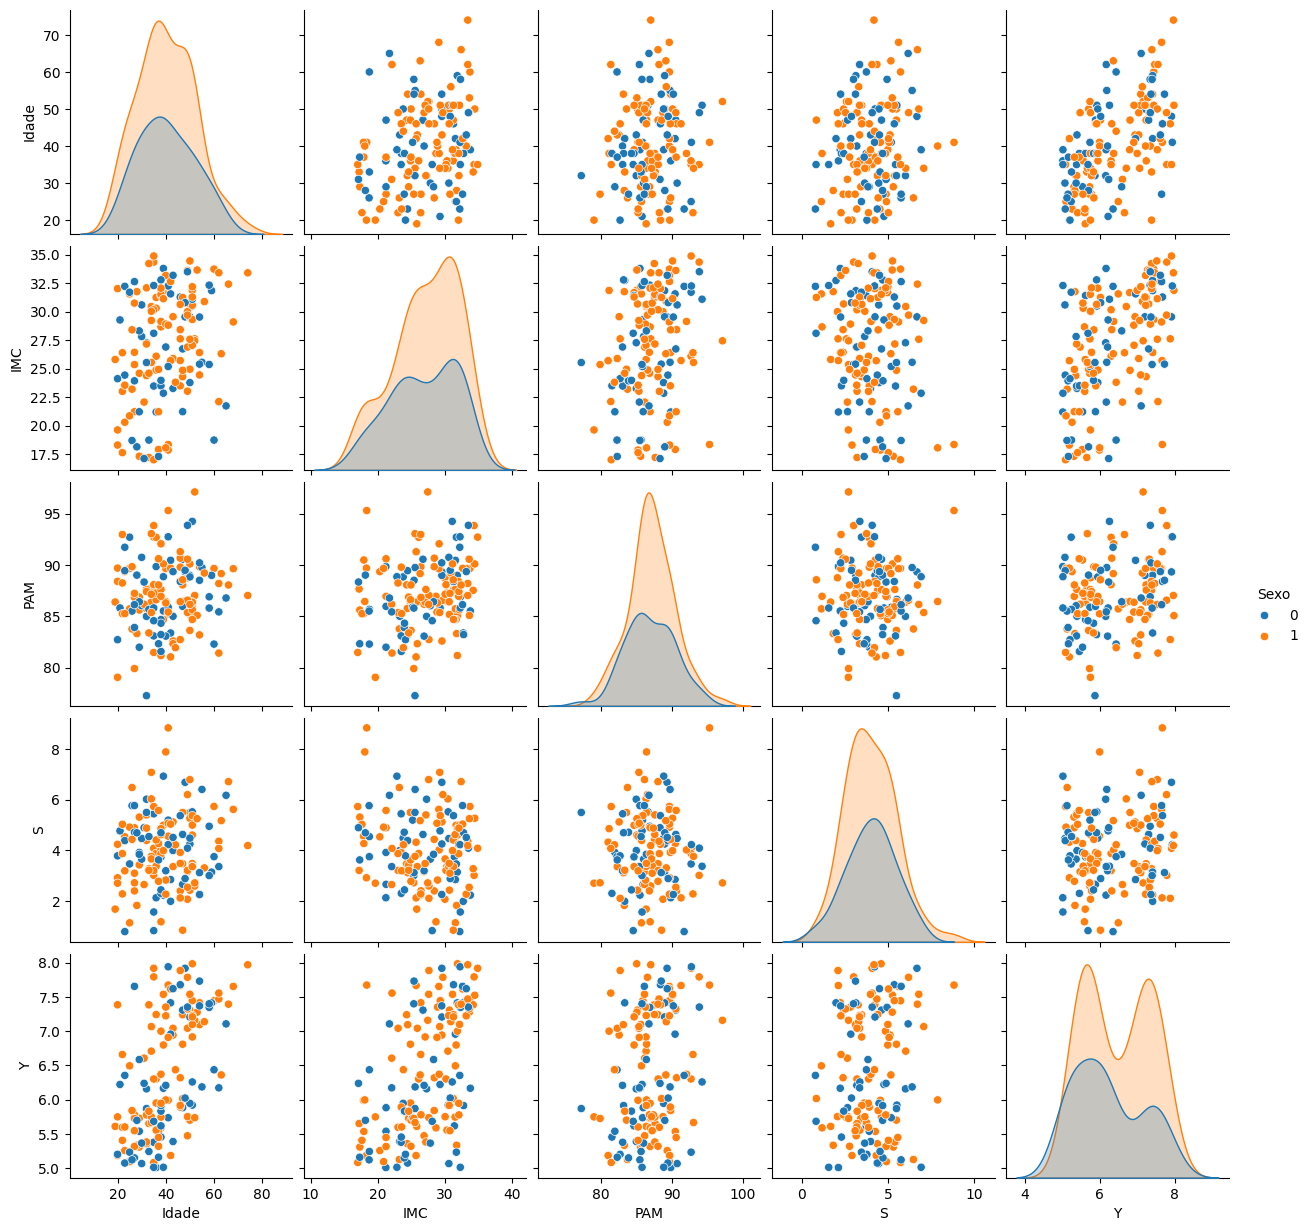

In [3]:
# Sugestão: separar por sexo
sns.pairplot(df.drop('diabetes',axis=1), hue='Sexo');

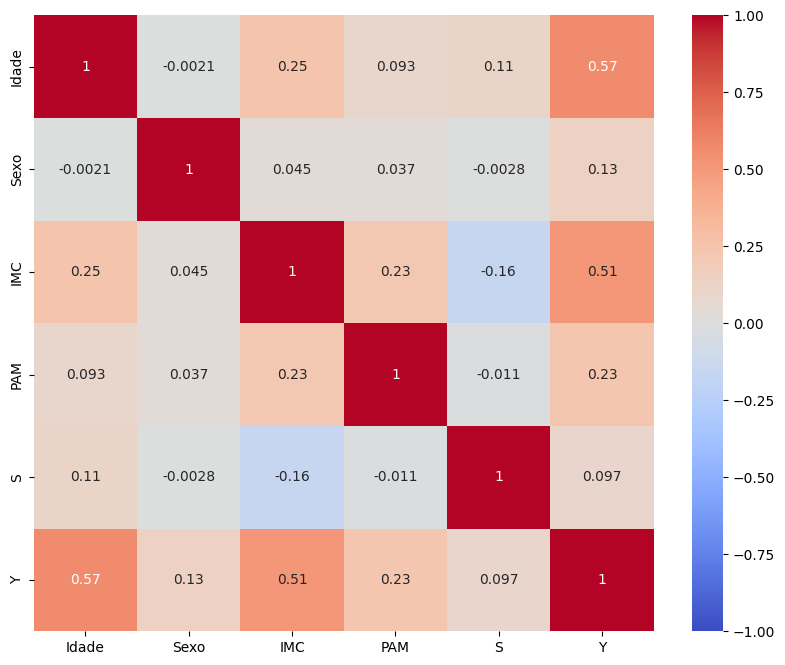

In [4]:
# Matriz de correlações
correlation_matrix = df.drop('diabetes',axis=1).corr();

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

1. Investigue a associação de cada uma das variáveis com a resposta 'Y' com uma análise exploratória de dados via matriz de gráficos de dispersão e matriz de correlações, para verificar a associação entre as variáveis. Comente os resultados obtidos.

In [5]:
df['Sexo'].value_counts(normalize=True)

Sexo
1    0.64
0    0.36
Name: proportion, dtype: float64

- **Correlação Alta de IMC e Idade com o target**: IMC e Idade são as features com uma correlação maior entre as variáveis. IMC apresenta uma correlação positiva de 0.51 e idade de 0.57. Ou seja, quanto maior o Y (hemoglobina glicada) maior a idade das pessoas e tambémo índice de massa corporal. Isso pode ser devido a vários fatores, como mudanças no metabolismo, redução da atividade física ou alterações na composição corporal.<br>
- **Correlação Baixa com S**: Uma correlação baixa entre a medida de soro sanguíneo S e o target. A relação entre os dois vaores é a mais baixa, apenas 0.097. Sugere que S pode não ser um bom preditor.
- **Desbalanceamento de Classes**: As classes estão desbalanceadas. Podemos ver isso pela variável sexo. Onde 64% das pessoas são mulheres frente a apenas 36% dos homens na base para predissão. O que pode causar viéses no modelo preditivos.


# 2. Modelo de regressão linear
(Alguns códigos são sugeridos. Inclua outros, se necessário, e responda às perguntas)


In [6]:
# Modelo de regressão linear
from statsmodels.formula.api import ols

mod = ols('Y ~  Idade + Sexo +  IMC + PAM + S', data=df)
res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     29.26
Date:                Sun, 16 Jun 2024   Prob (F-statistic):           2.05e-20
Time:                        19:31:57   Log-Likelihood:                -144.22
No. Observations:                 150   AIC:                             300.4
Df Residuals:                     144   BIC:                             318.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1713      1.401      0.122      0.9

Ajuste um modelo de regressão linear com intercepto, com resposta 'Y' e todas as variáveis preditoras: 'Idade', 'Sexo', 'IMC', 'PAM' e 'S'. Considerando o valor-p (P>|t|), indique as duas preditoras com maior significância estatística marginal neste modelo e interprete seus coeficientes.




Analisando a tabela dos valores dos modelo de regressão linear. Podemos destacar as features Idade e IMC como boas preditoras. Ambas as variáveis tem um p-valor baixo: 0.000. Um valor-p baixo sugere que há evidências estatísticas suficientes para afirmar que a variável tem um efeito significativo sobre a variável alvo.<br>
Idade tem um coeficiente de 0.0345 com um p-valor de 0.000, indicando uma forte relação positiva e estatisticamente significativa com a target. E a variável 'IMC' apresenta um coeficiente maior, de 0.0730, com um p-valor, também, de 0.000, também mostra uma relação positiva e estatisticamente significativa com 'Y'.<br>
As outras variáveis, como Sexo, PAM e S, têm p-valores mais altos. O que sugere que elas não são estatísticamente tão influentes sobre a target quanto IMC e Idade. Apesar de 'Sexo' ter um coeficiente maior, seu p-valor é 0.053.


# 3. Análise descritiva e exploratória
(Alguns códigos são sugeridos. Inclua outros, se necessário, e responda às perguntas)

**Análise descritiva**

    Faça uma análise descritiva dos dados. Qual o percentual de pacientes de cada sexo que desenvolveu e não desenvolveu diabetes? Investigue a associação de cada uma das preditoras contínuas com a resposta 'diabetes' via análise exploratória de dados para verificar a associação entre as variáveis. Comente os resultados obtidos.



In [7]:
df.describe()

,Idade,Sexo,IMC,PAM,S,Y,diabetes
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,40.300000,0.640000,27.118157,87.078697,4.017304,6.383655,0.420000
std,11.697387,0.481608,4.807848,3.314999,1.444145,0.901606,0.495212
min,19.000000,0.000000,17.030100,77.266400,0.800400,5.010800,0.000000
25%,32.000000,0.000000,23.855675,85.261550,3.108550,5.613175,0.000000
50%,39.000000,1.000000,27.612400,86.862750,3.958850,6.216600,0.000000
75%,49.000000,1.000000,31.289575,89.359175,4.986000,7.268900,1.000000
max,74.000000,1.000000,34.893300,97.128700,8.836000,7.983600,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 112126 to 358186
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Idade     150 non-null    int64  
 1   Sexo      150 non-null    int64  
 2   IMC       150 non-null    float64
 3   PAM       150 non-null    float64
 4   S         150 non-null    float64
 5   Y         150 non-null    float64
 6   diabetes  150 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 9.4 KB


## IMC

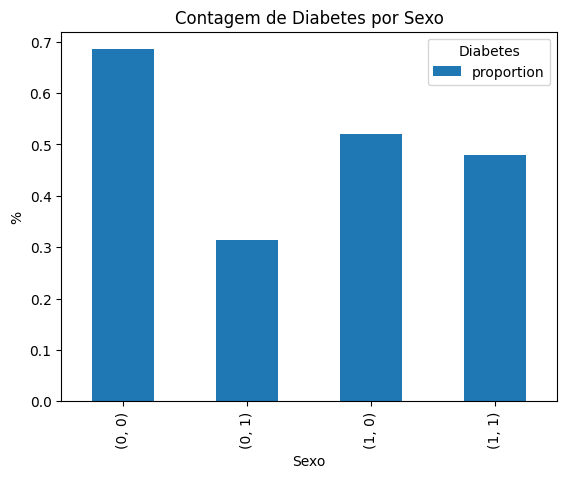

In [11]:
df.groupby('Sexo')['diabetes'].value_counts(normalize=True).plot(kind='bar', stacked=False)

# Adicionamos títulos e rótulos para clareza
plt.title('Contagem de Diabetes por Sexo')
plt.xlabel('Sexo')
plt.ylabel('%')
plt.legend(title='Diabetes')

# Mostramos o gráfico
plt.show()

In [75]:
# Separando a coluna IMC para uma melhor análise
# A distribuição entre sobrepeso, peso normal e baixo peso é bem parecida. Por volta de 30% para cada uma.
bins = [18.5, 24.9, 29.9, 34.9, 39.9, 40]
faixas = ['Baixo peso', 'Peso normal', 'Sobrepeso', 'Obesidade Grau I', 'Obesidade grau II', 'Obesidade Grau III' 'Mais de 55 anos']

df['faixas de IMC'] = pd.cut(df['IMC'], bins=bins, labels=faixas[:-1])


df['faixas de IMC'].value_counts(normalize=True)

faixas de IMC
Sobrepeso            0.398551
Peso normal          0.333333
Baixo peso           0.268116
Obesidade Grau I     0.000000
Obesidade grau II    0.000000
Name: proportion, dtype: float64

C:\Users\feh_s\AppData\Local\Temp\ipykernel_788\1337594842.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('faixas de IMC')['diabetes'].value_counts(normalize=True).plot(kind='bar', stacked=True)


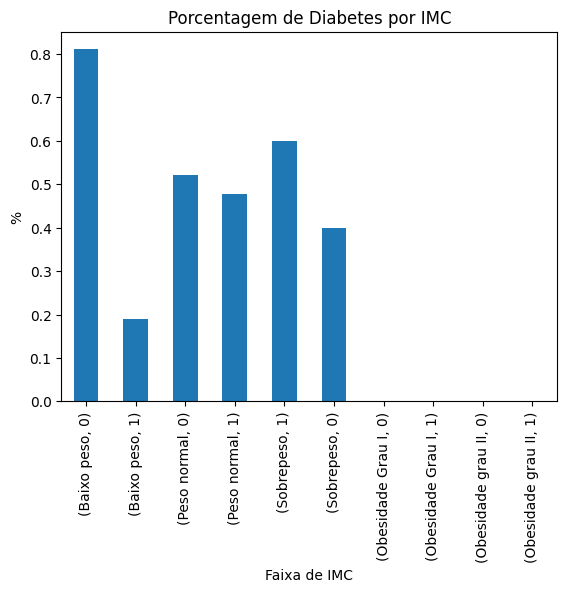

In [14]:
# Pessoas com baixo IMC tem menos chance de ter diabetes
# Não temos casos de Obesidade no dataset
# A categoria sobrepeso é a única em que a incidência de diabetes é maior que a não incidência
df.groupby('faixas de IMC')['diabetes'].value_counts(normalize=True).plot(kind='bar', stacked=True)

# Adicionamos títulos e rótulos para clareza
plt.title('Porcentagem de Diabetes por IMC')
plt.xlabel('Faixa de IMC')
plt.ylabel('%')


# Mostramos o gráfico
plt.show();

In [78]:
def data_frame(col):
    df_grouped = (
        df
        .groupby(col)['diabetes']
        .value_counts(normalize=True)
        .rename('percent')
        .mul(100)
        .round(2)
    )
       
    return df_grouped

In [79]:
data_frame('faixas de IMC')

C:\Users\feh_s\AppData\Local\Temp\ipykernel_788\3498263649.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



faixas de IMC      diabetes
Baixo peso         0           81.08
                   1           18.92
Peso normal        0           52.17
                   1           47.83
Sobrepeso          1           60.00
                   0           40.00
Obesidade Grau I   0            0.00
                   1            0.00
Obesidade grau II  0            0.00
                   1            0.00
Name: percent, dtype: float64

## Sexo

In [83]:
df['Sexo_nome'] = df['Sexo'].map({ 0: 'masculino', 1: 'feminino'})

df.head()

,Idade,Sexo,IMC,PAM,S,Y,diabetes,faixas de IMC,Sexo_nome
ID,,,,,,,,,
112126,32,0,27.2878,84.9978,6.0216,6.1589,0,Peso normal,masculino
897505,43,1,29.5730,82.5959,5.1257,6.9437,1,Peso normal,feminino
650952,47,1,24.3119,88.0686,3.4778,7.2397,1,Baixo peso,feminino
555951,35,1,34.3610,93.8493,3.0192,7.7926,1,Sobrepeso,feminino
321314,54,1,26.4282,89.8297,2.2501,7.4150,1,Peso normal,feminino


In [84]:
## Mulheres tem maior tendência de ter diabetes. Se olharmos individualmente para cada faixa de IMC. Sobrepeso, onde tem maior incidência da doença, as mulheres tem mais, proporcionalmente, diabetes que os homens.
## Pessoas com sobrepeso tem uma tendência maior em desenvolver diabetes
print(
        df
        .groupby(['faixas de IMC', 'Sexo_nome'])['diabetes']
        .value_counts(normalize=True)
        .rename('percent')
        .mul(100)
        .round(2)
    );

faixas de IMC      Sexo_nome  diabetes
Baixo peso         feminino   0           70.00
                              1           30.00
                   masculino  0           94.12
                              1            5.88
Peso normal        feminino   0           51.61
                              1           48.39
                   masculino  0           53.33
                              1           46.67
Sobrepeso          feminino   1           66.67
                              0           33.33
                   masculino  0           52.63
                              1           47.37
Obesidade Grau I   feminino   0            0.00
                              1            0.00
                   masculino  0            0.00
                              1            0.00
Obesidade grau II  feminino   0            0.00
                              1            0.00
                   masculino  0            0.00
                              1            0.00
N

C:\Users\feh_s\AppData\Local\Temp\ipykernel_788\1221942627.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



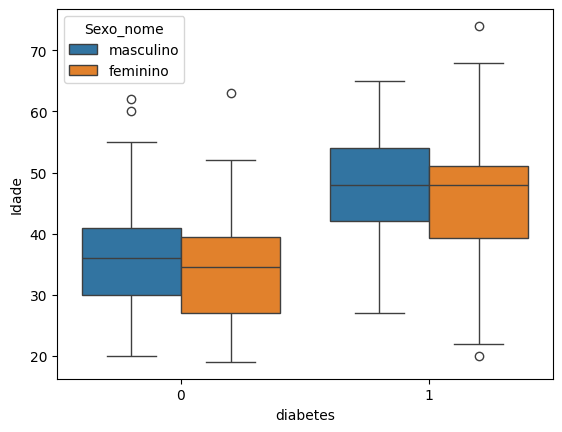

In [19]:
# Se olharmos para idade os homens tem maior prevalência da doença. A concentração de homens entre Q1 e Q3 ten maior prevalência de diabetes que as mulheres.
# Podemos observar tambeém, conforme aumenta a idade, também, aumenta a incidência de diabetes.
sns.boxplot(data=df, x='diabetes', y='Idade', hue='Sexo_nome');

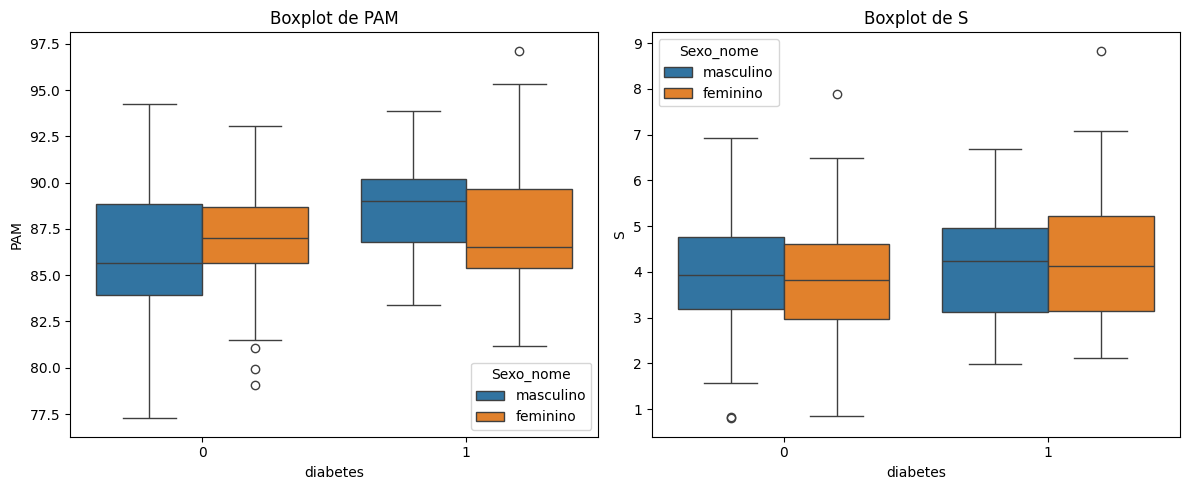

In [104]:
# As duas outras features, S e PAM, não mostram grandes variações entre ter ou não ter diabetes.

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=df, x='diabetes', y='PAM', hue='Sexo_nome', ax=axes[0])
axes[0].set_title('Boxplot de PAM')

sns.boxplot(data=df, x='diabetes', y='S', hue='Sexo_nome', ax=axes[1])
axes[1].set_title('Boxplot de S')


plt.tight_layout()

plt.show();


# 4. Modelo de regressão logística
(Alguns códigos são sugeridos. Inclua outros, se necessário, e responda às perguntas)

    Ajuste um modelo de regressão logística com intercepto para a resposta 'diabetes' com preditoras 'Idade', 'Sexo', 'IMC', 'PAM' e 'S'. Esse modelo é um MLG com resposta binomial e ligação logito. Avalie como as preditoras 'Idade' e 'IMC' influenciam na resposta 'diabetes' (sugestão: razão de chances, dada neste modelo por OR=exp(bj), em que bj é o coeficiente estimado correspondente à j-ésima preditora).



In [28]:
# Preditoras
preditoras = df[['Idade','Sexo', 'IMC', 'PAM', 'S']]
preditoras_com_intercepto = sm.add_constant(preditoras)

# Resposta
resposta = df['diabetes']

# Modelo de regressão logística com intercepto
glm_binom = sm.GLM(resposta, preditoras_com_intercepto, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               diabetes   No. Observations:                  150
Model:                            GLM   Df Residuals:                      144
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -65.379
Date:                Sun, 16 Jun 2024   Deviance:                       130.76
Time:                        19:33:49   Pearson chi2:                     144.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3867
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.2384      6.166     -3.120      0.0

In [29]:
# preditoras = df[['Idade', 'IMC']]
# preditoras_com_intercepto = sm.add_constant(preditoras)

# glm_binom = sm.GLM(resposta, preditoras, family=sm.families.Binomial())
# res = glm_binom.fit()
# print(res.summary())


Analisando a tabela de saída do modelo de regressão logística, podemos interpretar que:


Intercepto (const), o coeficiente do intercepto é -19.2384 com um erro padrão de 6.166. O valor de z é -3.120 O que indica que o intercepto é significativamente diferente de zero com um p-valor de 0.002. Isso sugere que, quando todas as outras variáveis são iguais a zero, chance de ter diabetes é -19.2384.

Para cada aumento de uma unidade na idade, espera-se que a variável de ter diabetes aumente em 0.1088, mantendo todas as outras variáveis constantes. Sendo um efeito estatísticamente relevante, pois o P-valor é igual a 0.000.

O coeficiente de 0.2650 para o IMC também sugere que o aumento de uma unidade da variável aumenta a chance de ter diabetes em 0.2650, mantendo todas as outras variáveis constantes. Sendo um efeito estatísticamente relevante, pois o P-valor é igual a 0.000.

O coeficiente para a variável Sexo é 1.0417, Este efeito também é estatisticamente significativo com um valor de p de 0.027.

# 5. Análise de pontos de alavanca
(Alguns códigos são sugeridos. Inclua outros, se necessário, e responda às perguntas)

    Desenvolva uma análise de pontos de alavanca e, caso haja alguma observação em destaque, identifique-a e investigue se ela contém algum comportamento inesperado.

**Análise de pontos de alavanca**

In [31]:
import plotly.express as px
fig = px.scatter(y=res.get_influence().hat_matrix_diag)
fig.show()

In [71]:
df.iloc[18]

# [['Idade','Sexo', 'IMC', 'PAM', 'S']]

Idade                  41
Sexo                    1
IMC               18.3682
PAM                95.312
S                   8.836
Y                   7.673
diabetes                1
faixas de IMC         NaN
Sexo_nome        feminino
Name: 622034, dtype: object

In [108]:
for col in df.columns:
    print(f"Coluna: {col}, Valor máximo: {max(df[col])}")

Coluna: Idade, Valor máximo 74
Coluna: Sexo, Valor máximo 1
Coluna: IMC, Valor máximo 34.8933
Coluna: PAM, Valor máximo 97.1287
Coluna: S, Valor máximo 8.836
Coluna: Y, Valor máximo 7.9836
Coluna: diabetes, Valor máximo 1


TypeError: '>' not supported between instances of 'float' and 'str'

In [73]:
# Preditoras
df2 = df.drop(df.index[18])
preditoras = df2[['Idade','Sexo', 'IMC', 'PAM', 'S']]
preditoras_com_intercepto = sm.add_constant(preditoras)

# Resposta
resposta = df2['diabetes']

# Modelo de regressão logística com intercepto
glm_binom = sm.GLM(resposta, preditoras_com_intercepto, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               diabetes   No. Observations:                  149
Model:                            GLM   Df Residuals:                      143
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -64.271
Date:                Sun, 16 Jun 2024   Deviance:                       128.54
Time:                        20:38:36   Pearson chi2:                     144.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3906
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.9301      6.303     -2.686      0.0

In [74]:
fig = px.scatter(y=res.get_influence().hat_matrix_diag)
fig.show()

No primeiro modelo podemos ver que temos um ponto de alavanca. A entrada x=18. Essa entrada se destaca dos demais valores preditos.
No primeiro modelo temos um coef igual a  -19.2384, um desvio padrão de  6.166, e um P-valor de   0.002

O valor provavelmente é um outlier porque PAM está próximo ao valor máximo e S é o valor máximo do dataset

Treinando o modelo novamente, agora sem o outlier. Temos que: no intercepto um coef de -16.9301, um desvio padrão de:      6.303  e um P-valor de      0.007     

podemos ver então qeu sem essa entrada o modelo tem uma mudança em seu desempenho, mas não o suficiente para inferirmos que é um ponto de alavanca

No primeiro modelo  temos que a entrada x=18 parece ser um ponto de alavanca significativo, sendo um outlier em relação com as outras predições.<br>
O primeiro modelo, no intercepto, tem um coeficiente de -19.2384, um desvio padrão de 6.166, e um P-valor de 0.002. Essa entrada, possivelmente, é um outlier pois o valor de PAM está próximo ao valor máximo e S é o valor máximo do conjunto de dados.<br>
Ao remover essa entrada e treinar o modelo novamente, observamos uma mudança nos parâmetros estimados: o coeficiente do intercepto passa a ser -16.9301, com um desvio padrão de 6.303 e um P-valor de 0.007. Embora haja uma alteração no desempenho do modelo, essa mudança não é suficiente para classificar a entrada original como um ponto de alavanca. Isso sugere que, enquanto a entrada x=18 tem um impacto ela não determina o desempenho do modelo.